In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from tensorflow.keras.models import *
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import *
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold

In [3]:
train = pd.read_csv('gdrive/MyDrive/data/train.csv').iloc[:, 1:]
test = pd.read_csv('gdrive/MyDrive/data/test.csv').iloc[:, 1:]
submission = pd.read_csv('gdrive/MyDrive/data/sample_submission.csv')

In [4]:
X = np.array(train.drop('label', axis = 1), dtype = 'float32')
y = train.label
target = np.array(test, dtype='float32')

In [5]:
X /= 255
target /= 255

In [7]:
X = X.reshape(-1, 28,28,1)
target = target.reshape(-1, 28,28,1)

In [8]:
np.random.seed(0)

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(X, 
                                                  y, 
                                                  test_size = 0.2, 
                                                  random_state=100)

In [10]:
earlyStopping = EarlyStopping(patience = 10, verbose=1, monitor = 'val_acc', mode = 'max')

In [11]:
model = Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(5,5),activation='relu',padding='same')) 
model.add(BatchNormalization())
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

history = model.fit(X_train, Y_train, epochs = 200, batch_size = 50,
                      validation_data = (X_val, Y_val), callbacks = [earlyStopping])
  
pred = model.predict(target)

Epoch 1/200
960/960 [==============================] - 43s 14ms/step - loss: 0.7426 - acc: 0.7323 - val_loss: 0.3732 - val_acc: 0.8624
Epoch 2/200
960/960 [==============================] - 13s 14ms/step - loss: 0.4447 - acc: 0.8404 - val_loss: 0.3183 - val_acc: 0.8862
Epoch 3/200
960/960 [==============================] - 14s 14ms/step - loss: 0.3775 - acc: 0.8660 - val_loss: 0.2813 - val_acc: 0.8977
Epoch 4/200
960/960 [==============================] - 14s 14ms/step - loss: 0.3438 - acc: 0.8778 - val_loss: 0.2688 - val_acc: 0.9023
Epoch 5/200
960/960 [==============================] - 14s 14ms/step - loss: 0.3235 - acc: 0.8837 - val_loss: 0.2488 - val_acc: 0.9090
Epoch 6/200
960/960 [==============================] - 14s 14ms/step - loss: 0.3064 - acc: 0.8904 - val_loss: 0.2383 - val_acc: 0.9126
Epoch 7/200
960/960 [==============================] - 14s 14ms/step - loss: 0.2921 - acc: 0.8944 - val_loss: 0.2252 - val_acc: 0.9185
Epoch 8/200
960/960 [==============================] - 

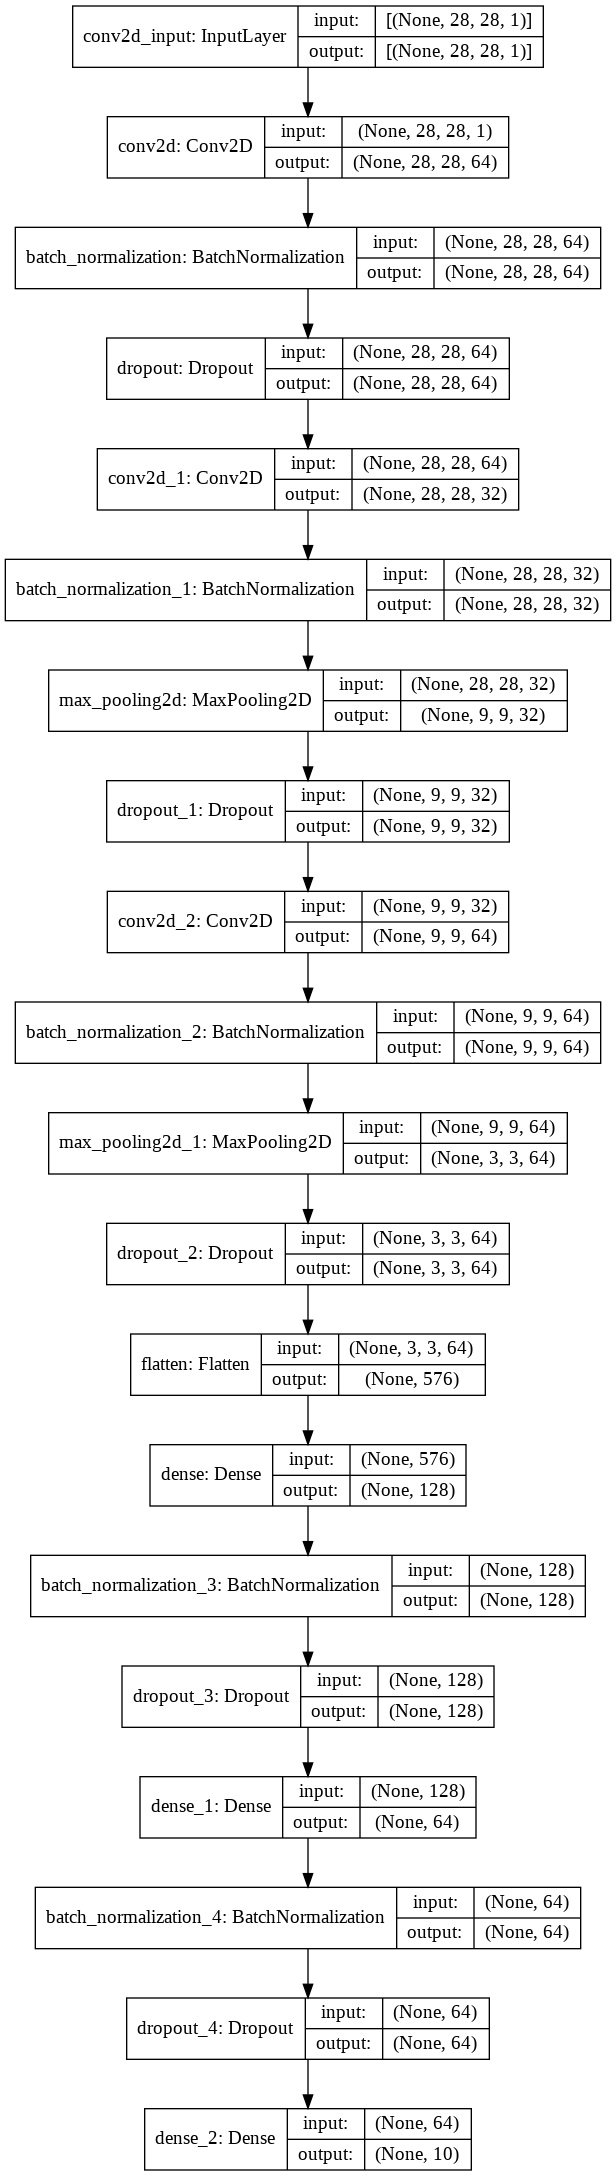

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [15]:
submission['label'] = [np.argmax(x) for x in pred] # 각 클래스별 확률에서 제일 높은 확률의 클래스 할당

In [16]:
submission.to_csv('submission.csv', index = False)